In [1]:
import pandas as pd 
import numpy as np 


df = pd.read_csv("C:\\cleaning data\\Dataset\\train.csv")
df.head()

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
0,MSC_83537.0,Estrellitas y Duendes,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,Scale E,0.147134,-14.140,NaN,Major,0.046404,143.78799999999998,Band,0.598965,Jazz
1,MSC_22044.0,Al Norte,59.827,1.009380,0.687542,216232.195,0.265942,0.000031,Scale A,0.174655,-13.716,Male,?,0.039949,?,Band,0.357194,Jazz
2,MSC_62017.0,Yeah! (feat. Lil Jon & Ludacris),89.023,0.020041,0.967948,273314.723,0.857411,0.000000,Scale D,0.042030,-4.995,Female,Major,0.119917,105.01799999999999,Band,0.635525,Rap
3,MSC_76365.0,Can’t You See,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,Scale D,0.124637,-4.262,Both,Major,0.167493,?,Duet,0.983750,Rock
4,MSC_71493.0,"Sonata III (G Moll), BWV 1029: Adagio",45.095,0.858769,0.280645,410136.987,0.114732,0.002753,Scale F Sharp,0.134782,-26.922,Female,Minor,0.039139,112.18299999999999,Band,0.074412,Classical


In [8]:
features =df[['popularity','acousticness','danceability','instrumentalness','loudness','valence']]
target=df['music_genre']

In [14]:
df.isnull().sum()

instance_id          0
track_name           0
popularity           0
acousticness         0
danceability         0
duration_ms          0
energy               0
instrumentalness     0
key                  0
liveness             0
loudness             0
voice_gender         0
mode                 0
speechiness          0
tempo                0
musician_category    0
valence              0
music_genre          0
dtype: int64

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loudness'>

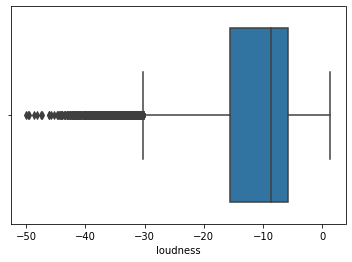

In [3]:
import seaborn as sns

sns.boxplot(df['loudness'])

In [4]:
df['popularity'] =[98.558 if x > 98.558 else x for x in df['popularity']]

In [5]:
df['loudness'].value_counts()

-1.000     1018
-7.425        8
-6.065        6
-6.279        6
-4.659        6
           ... 
-1.936        1
-17.253       1
-8.686        1
-9.896        1
-7.257        1
Name: loudness, Length: 10473, dtype: int64

In [10]:
df['loudness'].median()

-8.611

In [6]:
df.dropna(inplace=True)

In [25]:
df.isnull().sum()

instance_id          0
track_name           0
popularity           0
acousticness         0
danceability         0
duration_ms          0
energy               0
instrumentalness     0
key                  0
liveness             0
loudness             0
voice_gender         0
mode                 0
speechiness          0
tempo                0
musician_category    0
valence              0
music_genre          0
dtype: int64

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBRFClassifier

model = RandomForestClassifier()

model1 = XGBRFClassifier(n_estimators=100, learning_rate =1.0, )

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(model1, features, target, scoring='accuracy', cv=cv, n_jobs=-1)









n_scores.mean()



0.7340364741641336

In [14]:
n_scores.std()

0.008611498120242188

In [15]:
df.head(50)

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
1,MSC_22044.0,Al Norte,59.827,1.009380,0.687542,216232.195,0.265942,0.000031,Scale A,0.174655,-13.716,Male,?,0.039949,?,Band,0.357194,Jazz
2,MSC_62017.0,Yeah! (feat. Lil Jon & Ludacris),89.023,0.020041,0.967948,273314.723,0.857411,0.000000,Scale D,0.042030,-4.995,Female,Major,0.119917,105.01799999999999,Band,0.635525,Rap
3,MSC_76365.0,Can’t You See,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,Scale D,0.124637,-4.262,Both,Major,0.167493,?,Duet,0.983750,Rock
4,MSC_71493.0,"Sonata III (G Moll), BWV 1029: Adagio",45.095,0.858769,0.280645,410136.987,0.114732,0.002753,Scale F Sharp,0.134782,-26.922,Female,Minor,0.039139,112.18299999999999,Band,0.074412,Classical
6,MSC_28346.0,Love More,64.265,0.000459,0.968723,203145.857,-1.000000,0.000384,Scale C Sharp,0.079220,-7.266,Male,Major,0.052014,104.95700000000001,Band,0.484246,Rap
8,MSC_25657.0,Juke Box Hero,73.420,0.090830,0.380147,275490.630,0.714246,0.000000,Scale A,0.089873,-5.972,Both,Major,0.070437,176.64700000000002,Duet,0.555169,Rock
9,MSC_54552.0,Shine on Harvest Moon,34.034,1.014646,0.672051,207299.190,0.048039,0.146346,Scale A Sharp,0.110850,-27.213,Both,Major,0.065935,117.155,Duet,0.590628,Jazz
11,MSC_82740.0,Built My Legacy (feat. Offset),62.597,0.267935,0.912405,200294.994,0.633814,0.000000,Scale C Sharp,0.091298,-5.270,Female,Major,0.340405,147.945,Solo,0.739298,Rap
12,MSC_86737.0,I Wanna Be Somebody,69.231,0.000894,0.310477,235977.425,0.893819,0.000000,Scale C Sharp,0.283206,-7.451,Male,Minor,0.050829,164.611,Band,0.557724,Rock
13,MSC_64882.0,Feelin' Sad,39.264,0.910839,0.401022,185250.384,0.222150,0.000000,Scale F,0.297563,-13.321,Female,Minor,0.035440,175.8,Band,0.569514,Jazz


In [16]:
df[['popularity','acousticness','danceability','instrumentalness','valence']].isnull().sum()

popularity          0
acousticness        0
danceability        0
instrumentalness    0
valence             0
dtype: int64

In [21]:
df['valence'].value_counts()

0.357194    1
0.983871    1
0.613128    1
0.388241    1
0.042982    1
           ..
0.476020    1
0.431612    1
0.324497    1
0.461570    1
0.358777    1
Name: valence, Length: 11756, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.1)

model1.fit(X_train,y_train)

y_pred_random = model1.predict(X_test)

accuracy_score(y_test,y_pred_random)

c:\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:38:31] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7542517006802721

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='valence'>

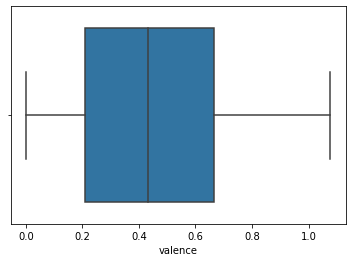

In [30]:
sns.boxplot(df['valence'])

In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)


y_pred= knn_clf.predict(X_test)

accuracy_score(y_test,y_pred)



0.5969387755102041

In [16]:
df_test = pd.read_csv("C:\\cleaning data\\Dataset\\test.csv")

In [60]:
df_test.shape

(3921, 17)

In [17]:
df_test.isnull().sum()

instance_id            0
track_name             0
popularity           166
acousticness           0
danceability         139
duration_ms           21
energy                33
instrumentalness      23
key                    0
liveness               0
loudness               3
voice_gender         186
mode                  14
speechiness            7
tempo                  0
musician_category    312
valence              191
dtype: int64

In [18]:
df_test1 =df_test[['popularity','acousticness','danceability','instrumentalness','loudness','valence']]


In [64]:
df_test1.shape

(3921, 6)

In [19]:
df_test1['popularity'].fillna(value=df_test1['popularity'].median(),inplace=True)
df_test1['danceability'].fillna(value=df_test1['danceability'].median(),inplace=True)
df_test1['instrumentalness'].fillna(value=df_test1['instrumentalness'].median(),inplace=True)
df_test1['loudness'].fillna(value=df_test1['loudness'].median(),inplace=True)
df_test1['valence'].fillna(value=df_test1['valence'].median(),inplace=True)

c:\python39\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
c:\python39\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
c:\python39\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
c:\python39\lib\

In [20]:

final_pred = pd.Series(model1.predict(df_test1), name="music_genre")

ID_column = df_test['instance_id']
results = pd.concat([ID_column, final_pred], axis=1)

results.shape

(3921, 2)

In [66]:
results

,instance_id,music_genre
0,MSC_70753.0,Classical
1,MSC_24064.0,Rock
2,MSC_22731.0,Rock
3,MSC_32095.0,Rock
4,MSC_24198.0,Jazz
...,...,...
3916,MSC_80955.0,Classical
3917,MSC_72767.0,Rock
3918,MSC_40192.0,Classical
3919,MSC_56067.0,Jazz


In [67]:
results.to_csv('C:\\cleaning data\\dataset\\RandomForest.csv',index = False)
